In [1]:
!pip install -q pandas numpy matplotlib scikit-learn tensorflow


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU


In [7]:
import pandas as pd

df = pd.read_csv("monthly_milk_production.csv")

df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")
df = df.rename(columns={"Production": "milk"})

df.head()


,milk
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [8]:
if 'Month' in df.columns:
    df['Month'] = pd.to_datetime(df['Month'])
    df = df.set_index('Month')
else:
    df.columns=['milk']
    df.index = pd.date_range(start='1962-01-01', periods=len(df), freq='M')
df = df.sort_index()
df.head()

C:\Users\91705\AppData\Local\Temp\ipykernel_11636\1556168759.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.index = pd.date_range(start='1962-01-01', periods=len(df), freq='M')


,milk
1962-01-31,589
1962-02-28,561
1962-03-31,640
1962-04-30,656
1962-05-31,727


In [9]:
print(df.shape)
print(df.describe().T)
print(df.isna().sum())

(168, 1)
      count        mean         std    min     25%    50%    75%    max
milk  168.0  754.708333  102.204524  553.0  677.75  761.0  824.5  969.0
milk    0
dtype: int64


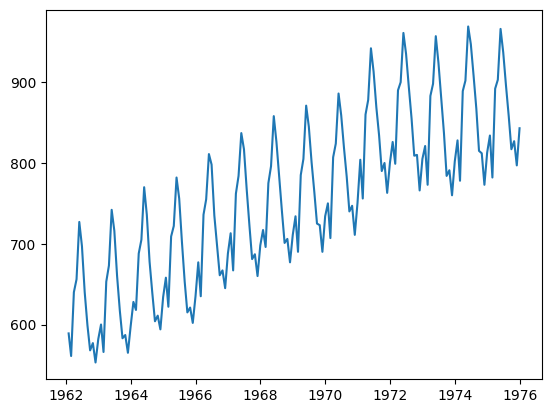

In [10]:
plt.plot(df.iloc[:,0])
plt.show()

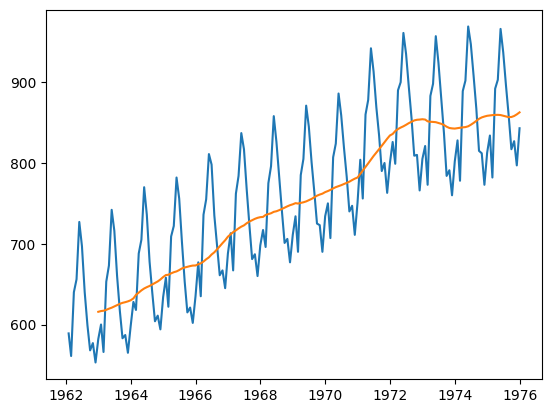

In [11]:
plt.plot(df.iloc[:,0])
plt.plot(df.iloc[:,0].rolling(12).mean())
plt.show()

In [12]:
vals = df.iloc[:,0].values.reshape(-1,1).astype('float32')
scaler = MinMaxScaler()
scaled = scaler.fit_transform(vals)

In [13]:
def make_sequences(data, window):
    X, y = [], []
    for i in range(len(data)-window):
        X.append(data[i:i+window,0])
        y.append(data[i+window,0])
    return np.array(X).reshape(-1,window,1), np.array(y)

window = 12
X, y = make_sequences(scaled, window)

In [14]:
train = int(len(X)*0.7)
val = int(len(X)*0.15)
X_train, y_train = X[:train], y[:train]
X_val, y_val = X[train:train+val], y[train:train+val]
X_test, y_test = X[train+val:], y[train+val:]

In [15]:
def build_rnn():
    m = Sequential()
    m.add(SimpleRNN(32, input_shape=(12,1)))
    m.add(Dense(1))
    m.compile('adam','mse')
    return m

rnn = build_rnn()
rnn.summary()

c:\Users\91705\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
def build_lstm():
    m = Sequential()
    m.add(LSTM(50, input_shape=(12,1)))
    m.add(Dense(1))
    m.compile('adam','mse')
    return m

lstm = build_lstm()
lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
def build_gru():
    m = Sequential()
    m.add(GRU(40, input_shape=(12,1)))
    m.add(Dense(1))
    m.compile('adam','mse')
    return m

gru = build_gru()
gru.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 40)             │         5,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,201 (20.32 KB)

 Trainable params: 5,201 (20.32 KB)

 Non-trainable params: 0 (0.00 B)

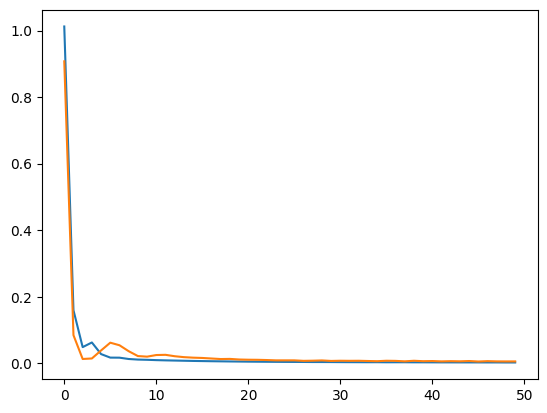

In [18]:
rnn_hist = rnn.fit(X_train, y_train, epochs=50, batch_size=16, 
                       validation_data=(X_val,y_val), verbose=0)
plt.plot(rnn_hist.history['loss'])
plt.plot(rnn_hist.history['val_loss'])
plt.show()

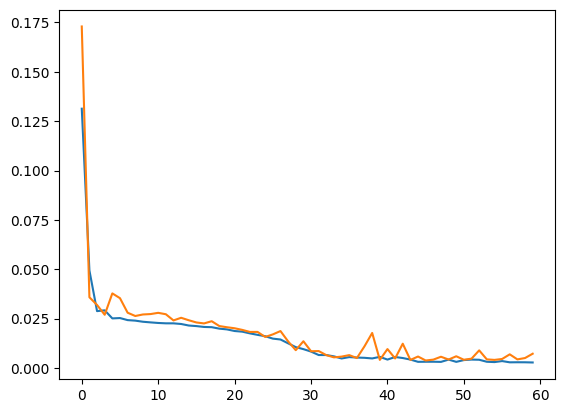

In [19]:
lstm_hist = lstm.fit(X_train, y_train, epochs=60, batch_size=16, 
                         validation_data=(X_val,y_val), verbose=0)
plt.plot(lstm_hist.history['loss'])
plt.plot(lstm_hist.history['val_loss'])
plt.show()

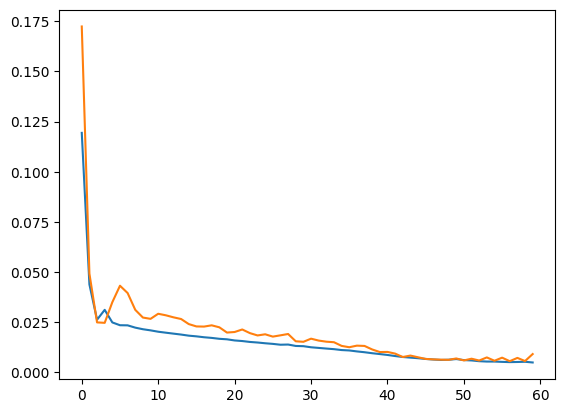

In [20]:
gru_hist = gru.fit(X_train, y_train, epochs=60, batch_size=16, 
                        validation_data=(X_val,y_val), verbose=0)
plt.plot(gru_hist.history['loss'])
plt.plot(gru_hist.history['val_loss'])
plt.show()

In [21]:
def inv_scale(a):
    a=np.array(a).reshape(-1,1)
    return scaler.inverse_transform(a).flatten()

def mape(t,p):
    t,p=np.array(t),np.array(p)
    m = t!=0
    return np.mean(np.abs((t[m]-p[m])/t[m]))*100

In [22]:
rnn_p = rnn.predict(X_test).flatten()
lstm_p = lstm.predict(X_test).flatten()
gru_p = gru.predict(X_test).flatten()

rnn_i = inv_scale(rnn_p)
lstm_i = inv_scale(lstm_p)
gru_i = inv_scale(gru_p)
y_i = inv_scale(y_test)

def show_metrics(name,t,p):
    rmse = math.sqrt(mean_squared_error(t,p))
    mae = mean_absolute_error(t,p)
    mp = mape(t,p)
    print(name, rmse, mae, mp)

show_metrics("RNN", y_i, rnn_i)
show_metrics("LSTM", y_i, lstm_i)
show_metrics("GRU", y_i, gru_i)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
RNN 34.71386069026949 28.105031967163086 3.1670856
LSTM 30.815978188575322 25.535921096801758 3.0289898
GRU 39.35596793262824 31.000717163085938 3.672503


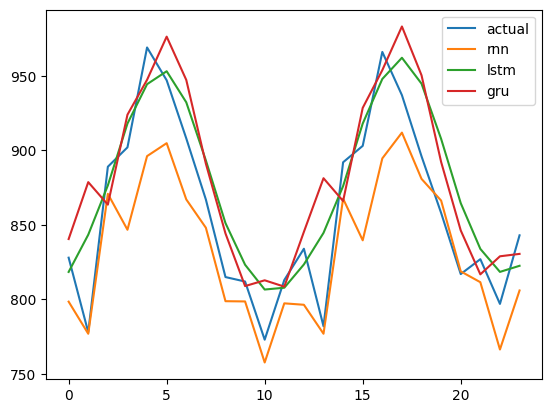

In [23]:
plt.plot(y_i, label='actual')
plt.plot(rnn_i, label='rnn')
plt.plot(lstm_i, label='lstm')
plt.plot(gru_i, label='gru')
plt.legend()
plt.show()

In [24]:
last = scaled[-12:].reshape(1,12,1)
future = 12
fs = []
c = last.copy()

for _ in range(future):
    p = lstm.predict(c).flatten()[0]
    fs.append(p)
    new = np.append(c[:,1:,0], [[p]], axis=1).reshape(1,12,1)
    c = new

pred12 = inv_scale(fs)
pred12

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([840.21204, 855.6429 , 901.03735, 930.67645, 957.5051 , 957.1671 ,
       940.72253, 914.8654 , 887.40906, 871.4301 , 856.2014 , 861.25195],
      dtype=float32)

C:\Users\91705\AppData\Local\Temp\ipykernel_11636\751678965.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_idx = pd.date_range(start=df.index[-1]+pd.offsets.MonthBegin(1),


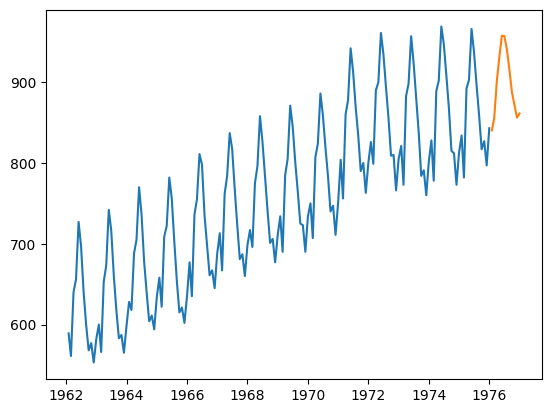

In [25]:
future_idx = pd.date_range(start=df.index[-1]+pd.offsets.MonthBegin(1),
                                 periods=12, freq='M')
plt.plot(df.index, df.iloc[:,0])
plt.plot(future_idx, pred12)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


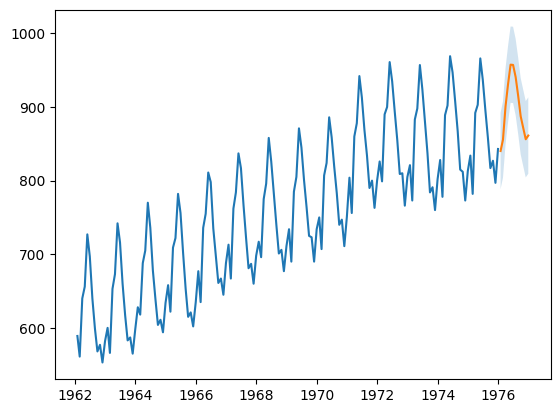

In [26]:
test_p = lstm.predict(X_test).flatten()
res = inv_scale(y_test) - inv_scale(test_p)
std = np.std(res)
u = pred12 + 1.96*std
l = pred12 - 1.96*std

plt.plot(df.index, df.iloc[:,0])
plt.plot(future_idx, pred12)
plt.fill_between(future_idx, l, u, alpha=0.2)
plt.show()